# 9-2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

- 터미널에서 `~/data/data/bike-sharing-demand` 경로에서 `train.csv` 데이터를 `train` 변수로 저장

In [1]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

- to_datetime 활용 : 링크 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [2]:
train["datetime"]

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [3]:
type(train["datetime"][0])

str

- 기존 데이터의 `datatime`컬럼이 문자형(str)인 것을 확인
- `datetime` 컬럼을 `datetime` 자료형으로 변환 후 확인

In [4]:
train["datetime"] = pd.to_datetime(train["datetime"])

In [5]:
train["datetime"]

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [6]:
type(train["datetime"][0])

pandas._libs.tslibs.timestamps.Timestamp

- 6가지 컬럼(연, 월, 일, 시, 분, 초) 생성 후 확인

In [7]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

- sns.countplot 활용해서 시각화
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화

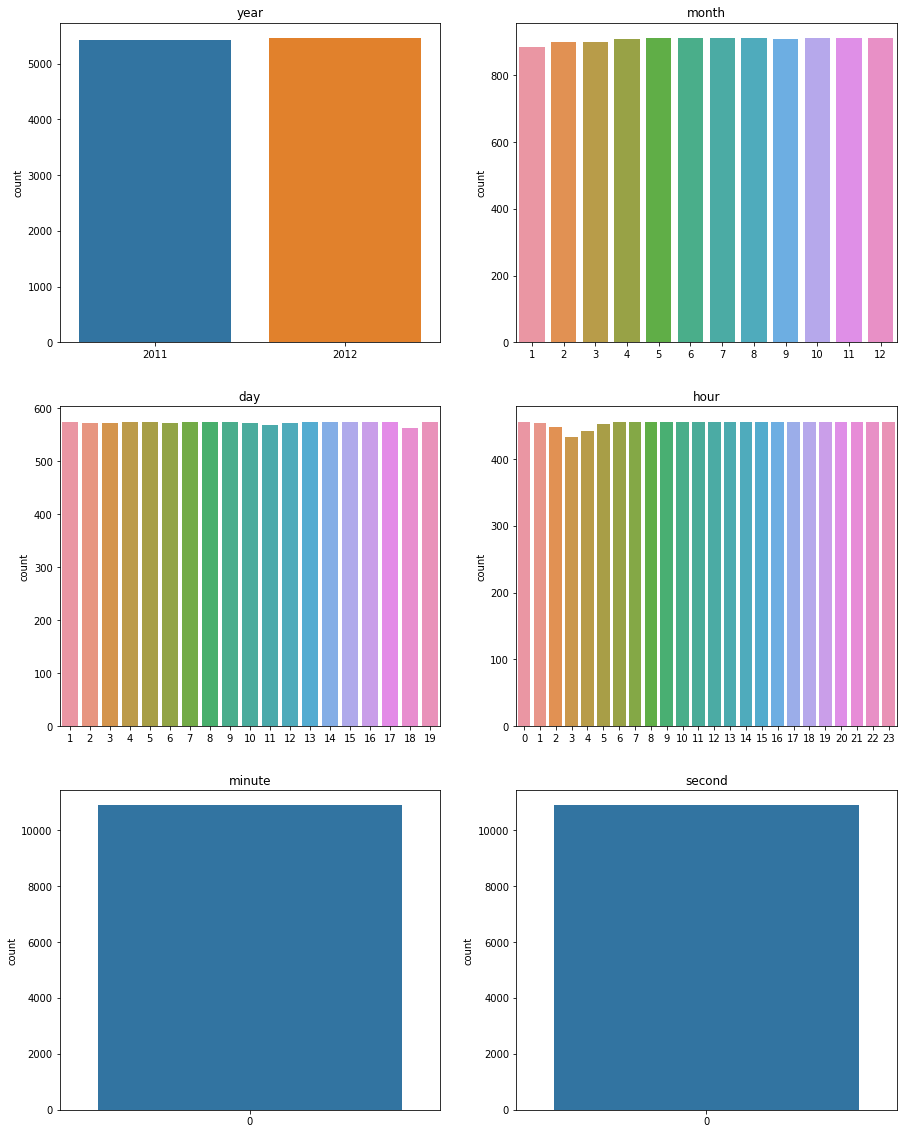

In [9]:
plt.figure(figsize=(15, 20))

coulums = ["year", "month", "day", "hour", "minute", "second"]

for i in range(len(coulums)):
    plt.subplot(3,2,i+1)
    sns.countplot(data=train, x=coulums[i]).set_xlabel('')
    plt.title(coulums[i])
    

- 년: 2011년, 2012년이 고루게 분포
- 월: 1~4월이 다소 적지만 12달 모두 거의 고루게 분포
- 일: 1~19까지만 있음. 모두 500후반대로 고루게 분포
- 시: 새벽 2~5시가 다른 시간에 비해 다소 적지만 골고루 분포
- 분, 초: 전부 0으로 구성되어 있음.


## (4) X, y 컬럼 선택 및 train/test 데이터 분리

### X 데이터용 컬럼 선정

In [10]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

- 날씨 좋은 월요일 오후 세 시, 자전거를 타는 사람은 몇 명인지 구하기 위한 데이터가 있는 컬럼을 선택해야 한다.
- 그러므로 날짜와 시간 데이터는 필요하다. 단, 모두 0뿐인 분, 초 컬럼은 제외한다.
    - 이미 6개의 컬럼으로 세분화했기 때문에 datetime 컬럼도 제외한다.
- 날씨 관련 데이터는 필요하다.
- count 값은 y값으로 넣어야 하므로 제외한다.
- casual, registered는 count값을 세분화한 내용, 즉, 둘을 합치면 구하고자 하는 답이기 때문에 제외한다. (예측을 위한 값으로 제시되지 않을 것이기도 함.)

- 또한, "월요일"에 몇 명인지는 구하는 문제이므로 요일값이 필요하다.
    - 현재 요일값이 없으므로 datetime에서 요일값을 추출하여 추가한다.

In [11]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [12]:
train['dayofweek'].unique()

array([5, 6, 0, 1, 2, 3, 4])

- 요일값이 0~6의 숫자로 표기되어 있다.
- 요일정보는 사실 문자로 구분하기 때문에 이러한 방식보다는 원핫인코딩 방식이 적절해 보인다.
- 요일 정보를 원핫인코딩 진행.

In [13]:
 train = pd.get_dummies(train, columns=['dayofweek'])

In [14]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,hour,minute,second,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,0,0,0,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,1,0,0,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,2,0,0,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,3,0,0,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,19,0,0,0,0,1,0,0,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,20,0,0,0,0,1,0,0,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,21,0,0,0,0,1,0,0,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,22,0,0,0,0,1,0,0,0,0


- 요일명 컬럼을 보다 알아보기 쉽게 수정

In [15]:
train = train.rename(columns={"dayofweek_0": "mon", "dayofweek_1": "tue", 
                      "dayofweek_2": "wed", "dayofweek_3": "thu", 
                      "dayofweek_4": "fri", "dayofweek_5": "sat", 
                      "dayofweek_6": "sun"})
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,hour,minute,second,mon,tue,wed,thu,fri,sat,sun
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,0,0,0,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,1,0,0,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,2,0,0,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,3,0,0,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,19,0,0,0,0,1,0,0,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,20,0,0,0,0,1,0,0,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,21,0,0,0,0,1,0,0,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,22,0,0,0,0,1,0,0,0,0


In [16]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'mon', 'tue', 'wed',
       'thu', 'fri', 'sat', 'sun'],
      dtype='object')

- 이제 위에서 언급한 기준으로 필요한 컬럼만 취하여 X에 저장

In [17]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp',
      'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
      'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']]

In [18]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,mon,tue,wed,thu,fri,sat,sun
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,0,0,0,0,0,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,0,0,0,0,0,1,0
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,0,0,0,0,0,1,0
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,0,0,0,0,0,1,0
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,0,0,0,0,0,1,0


### y 변수에 count 컬럼의 데이터 넣기

In [19]:
y = train['count'].values
y

array([ 16,  40,  32, ..., 168, 129,  88])

## (5) LinearRegression 모델 학습

- sklearn의 LinearRegression 모델 불러와서 객체 생성

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

- 학습, 테스트 데이터 나누기

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

- 학습

In [22]:
model.fit(X_train, y_train)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

- 학습된 모델에 X_test를 입력해서 예측값 출력

In [23]:
predictions = model.predict(X_test)
predictions

array([294.48142195, 126.25535347,  75.80634199, ..., 121.89892032,
        30.85713632, 214.57460169])

### 모델이 예측한 값과 정답 target 간의 손실함수 값 계산

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

- MSE

In [25]:
mse = mean_squared_error(y_test, predictions)
mse

20468.880655350436

- RMSE

In [26]:
rmse = np.sqrt(mse)
rmse

143.0694958939551

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화

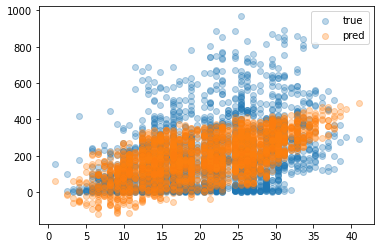

In [27]:
plt.scatter(X_test["temp"], y_test, label="true", alpha=0.3)
plt.scatter(X_test["temp"], predictions, label="pred", alpha=0.3)
plt.legend()
plt.show()

- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화

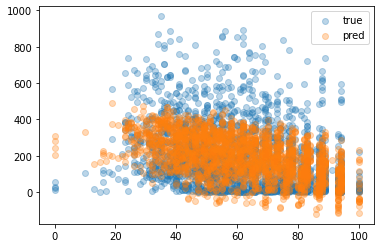

In [28]:
plt.scatter(X_test["humidity"], y_test, label="true", alpha=0.3)
plt.scatter(X_test["humidity"], predictions, label="pred", alpha=0.3)
plt.legend()
plt.show()

---

### 추가 실험
- year 값이 다른 특성에 비해 단위가 큰 것이 영향을 주었을 가능성에 대한 실험
- year 값을 min-max 스케일링을 적용한 데이터로 모델 테스트

In [29]:
# 2011, 2012 두가지 뿐이므로 각각 0, 1로 수정
X.loc[X["year"] == 2011, "year"] = 0
X.loc[X["year"] == 2012, "year"] = 1
X

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,mon,tue,wed,thu,fri,sat,sun
0,1,0,0,1,9.84,14.395,81,0.0000,0,1,1,0,0,0,0,0,0,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,0,1,1,1,0,0,0,0,0,1,0
2,1,0,0,1,9.02,13.635,80,0.0000,0,1,1,2,0,0,0,0,0,1,0
3,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,3,0,0,0,0,0,1,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,1,12,19,19,0,0,1,0,0,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,1,12,19,20,0,0,1,0,0,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,1,12,19,21,0,0,1,0,0,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,1,12,19,22,0,0,1,0,0,0,0


In [30]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [31]:
# 학습
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# 새 예측값
predictions_new = model.predict(X_test)
predictions_new

array([294.48142195, 126.25535347,  75.80634199, ..., 121.89892032,
        30.85713632, 214.57460169])

In [33]:
# MSE
mse_new = mean_squared_error(y_test, predictions_new)
mse_new

20468.880655350622

In [34]:
# RMSE
rmse_new = np.sqrt(mse)
rmse_new

143.0694958939551

- 차이 확인

In [42]:
# 차이 계산

mse_new - mse, mse == mse_new

(1.8553691916167736e-10, False)

In [41]:
rmse_new == rmse

True

- 결론: 그 차이가 매우 근소하여 영향이 거의 없다고 볼 수 있다.